Data types after conversion:
youtuber name        object
channel name         object
Category             object
Subscribers         float64
Audience Country     object
avg views           float64
avg likes           float64
avg comments        float64
dtype: object
Non-numeric values remaining per column:
Subscribers       0
avg views         0
avg likes        38
avg comments    209
dtype: int64


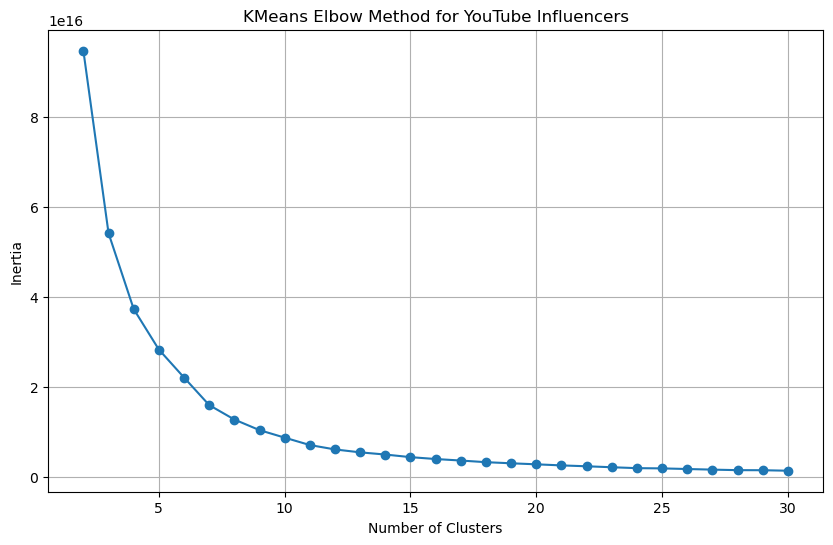

Cluster Summary (Average Characteristics):
          Subscribers     avg views      avg likes  avg comments
Cluster                                                         
0        1.244150e+07  1.011085e+06   51207.327373   3158.884176
1        4.855116e+07  1.038247e+06   59327.511628   3135.303030
2        2.506043e+07  1.137484e+06   45893.375691   3884.927536
3        9.751000e+07  7.756450e+06  203431.400000  12117.833333
4        2.121000e+08  3.237000e+05    9800.000000    290.000000
Total Gaming influencers: 0
P[Gaming] : 0.0
P[Cluster 0 | Gaming] : 0
Gaming influencers in Cluster 0: 0
P[Cluster 1 | Gaming] : 0
Gaming influencers in Cluster 1: 0
P[Cluster 2 | Gaming] : 0
Gaming influencers in Cluster 2: 0
P[Cluster 3 | Gaming] : 0
Gaming influencers in Cluster 3: 0
P[Cluster 4 | Gaming] : 0
Gaming influencers in Cluster 4: 0


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\abdul\OneDrive\Documents\UMD\FALL 24\INST 414\social media influencers - youtube.csv")

def convert_to_numeric(value_str):
    """Convert values with 'K' and 'M' suffixes to numeric."""
    # Ensure value_str is a string and remove commas
    value_str = str(value_str).replace(',', '').strip()
    
    # Handle 'M' and 'K' cases
    if 'M' in value_str:
        return float(value_str.replace('M', '')) * 1_000_000
    elif 'K' in value_str:
        return float(value_str.replace('K', '')) * 1_000
    else:
        try:
            return float(value_str)
        except ValueError:
            return np.nan

# Apply the conversion function to relevant columns
columns_to_convert = ['Subscribers', 'avg views', 'avg likes', 'avg comments']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Check if there are any non-numeric values remaining
print("Data types after conversion:")
print(df.dtypes)
print("Non-numeric values remaining per column:")
print(df[columns_to_convert].isna().sum())

# Fill NaN values in the features with 0 to avoid issues during clustering
features = df[['Subscribers', 'avg views', 'avg likes', 'avg comments']].fillna(0)

# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), inertia_values, marker='o')
plt.title("KMeans Elbow Method for YouTube Influencers")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 5  # Adjust based on plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Display the cluster summary for average characteristics
cluster_summary = df.groupby('Cluster')[['Subscribers', 'avg views', 'avg likes', 'avg comments']].mean()
print("Cluster Summary (Average Characteristics):")
print(cluster_summary)

# Probability calculation for a specific category
target_category = "Gaming"  
category_influencers = df[df['Category'] == target_category]['channel name'].tolist()
total_influencers = len(df)
total_target_category = len(category_influencers)
Pr_target_category = total_target_category / total_influencers
print(f"Total {target_category} influencers: {total_target_category}")
print(f"P[{target_category}] : {Pr_target_category}")

# Calculate conditional probabilities P[Cluster | Target Category]
for cluster_id, group in df.groupby('Cluster'):
    target_count = group['Category'].apply(lambda x: x == target_category).sum()
    P_cluster_and_target = target_count / total_influencers
    if Pr_target_category > 0:
        P_cluster_target = P_cluster_and_target / Pr_target_category
    else:
        P_cluster_target = 0
    print(f"P[Cluster {cluster_id} | {target_category}] : {P_cluster_target}")
    print(f"{target_category} influencers in Cluster {cluster_id}: {target_count}")


In [28]:
# Change the target category to "Video games"
target_category = "Video games"

# Redo the probability calculation using the corrected category
category_influencers = df[df['Category'] == target_category]['channel name'].tolist()
total_influencers = len(df)
total_target_category = len(category_influencers)
Pr_target_category = total_target_category / total_influencers if total_influencers > 0 else 0
print(f"Total {target_category} influencers: {total_target_category}")
print(f"P[{target_category}] : {Pr_target_category}")

# Calculate conditional probabilities P[Cluster | Target Category]
for cluster_id, group in df.groupby('Cluster'):
    target_count = group['Category'].apply(lambda x: x == target_category).sum()
    P_cluster_and_target = target_count / total_influencers
    if Pr_target_category > 0:
        P_cluster_target = P_cluster_and_target / Pr_target_category
    else:
        P_cluster_target = 0
    print(f"P[Cluster {cluster_id} | {target_category}] : {P_cluster_target}")
    print(f"{target_category} influencers in Cluster {cluster_id}: {target_count}")


Total Video games influencers: 84
P[Video games] : 0.084
P[Cluster 0 | Video games] : 0.8095238095238095
Video games influencers in Cluster 0: 68
P[Cluster 1 | Video games] : 0.011904761904761904
Video games influencers in Cluster 1: 1
P[Cluster 2 | Video games] : 0.15476190476190474
Video games influencers in Cluster 2: 13
P[Cluster 3 | Video games] : 0.023809523809523808
Video games influencers in Cluster 3: 2
P[Cluster 4 | Video games] : 0.0
Video games influencers in Cluster 4: 0
